## Clusterizare

**Clusterizarea** este o tehnica a invatarii nesupervizate care implica impartirea unui set de date neetichetat in grupari mai mici,numite clusteri, pe baza observatiilor intre feature-uri. Rezultand in atribuirea datelor in clase ce imbraca optim relatiile dintre ele.

Datele din aceeasi zona de culoare impart aceeasi clasa:
<div>
      <img src="https://developers.google.com/static/machine-learning/clustering/images/clustering_example.png" width="650px" height="350px">  
</div>


**Procesul de clusterizare** poate fi realizat prin mai multi algoritmi:


*   Clusterizarea pe baza de centroid, respectiv kmeans
<br>
*   Clusterizare pe baza de densitate: punctele care au distata intre ele sub un treshold fix intra in aceeasi clasa
<div>
      <img src="https://miro.medium.com/v2/resize:fit:664/1*qjIc4xmvlQ_Ma4i71V6fig.png" width="400px" height="350px">  
</div>
<div>
      <img src="https://media.geeksforgeeks.org/wp-content/uploads/20190418023034/781ff66c-b380-4a78-af25-80507ed6ff26.jpeg" width="400px" height="350px">  
</div>
<br>
*   Clusterizare pe baza de probabilitati, fiecarui punct ii este atribuita o probabilitate pentru de existenta lui intr-o anumita clasa
<div>
      <img src="https://miro.medium.com/v2/resize:fit:942/1*ws7kYA8UVphgsgJqQZtS_Q.png" width="600px" height="350px">  
</div>
<br>
*  Clusterizare ierarhica: o grupa poate contine alte subgrupe
<div>
      <img src="https://developers.google.com/static/machine-learning/clustering/images/HierarchicalClustering.svg" width="700px" height="350px">  
</div>




##Kmeans
 Este un algoritm general de clusterizare pe baza de centroizi. Acesta implica calcularea a **k** puncte numite centroizi ce stau in centrul zonei fiecarei clasei si atribuirea fiecarui punct din setul de date la clasa a carei centroid este cel mai apropiat de el.<br>
Pentru a deduce relatia dintre un punct si un centroid se pot folosi mai multe tipuri de distante:


*   Distanta Euclidiana pentru spatii continue: d = √(Σ(xi - yi)²)
*   Similaritatea cosinus: <br>
    - Pe baza unghiul dintre doi vectori calculeaza cat de similari sunt acestia
    <br>
  $\text{Cosine Similarity} = \frac{\vec{A} \cdot \vec{B}}{\|\vec{A}\| \|\vec{B}\|} = \frac{\sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \sqrt{\sum_{i=1}^{n} B_i^2}}$
*   Distanta Manhattan pentru spatii discrete: d = Σ|xi - yi|<br>
<br>

<div>
      <img src="https://miro.medium.com/v2/resize:fit:1400/1*VSVJz211MzPiVa39OtCO8A.png" width="350px" height="350px">  
</div>


<br>

Datorita modului in care se pot grupa usor si intuitiv datele ce au similaritati, kmeans are diverse aplicatii in industrie:
*   Analiza imaginilor medicale
*   Gruparea documentelor PDF
*   Analiza sentimentului de piata
*   Segmentarea imaginilor



<br>

Algoritmul are urmatorii pasi:
1.   Se stabileste un numar **k** de clase
2.   Pentru centroid-ul initial al fiecarei clase se selecteaza aleatoriu un punct din setul de date
3.   Se parcurge setul de date, se calculeaza distanta dintre puncte si centroizi si se atribuie punctele la clusterele cele mai apropiate.
4.   Se iau in parte clusterele si se calculeaza media coordonatelor punctelor continute.
5.   Pozitiile centroizilor se actualizeaza cu noile coordonate.
6.   Se repeta pasii 3-5 pana cand pozitiile centroizilor nu se mai schimba




Exemplu de input



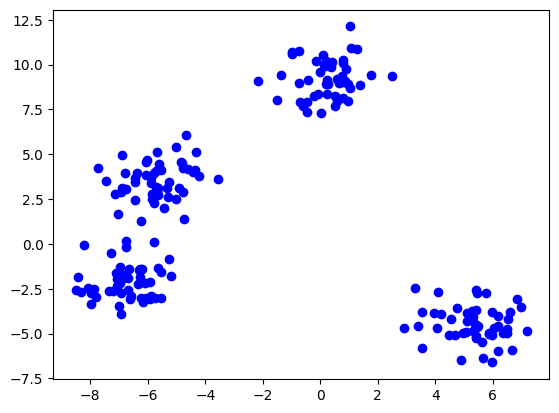

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs

data = np.array(make_blobs(n_samples=200, n_features = 2,  centers = 4, random_state=23)[0])

plt.scatter(data[:,0], data[:,1],color="blue")
plt.show()


## Implementare de mana

Selectam centroizii initiali

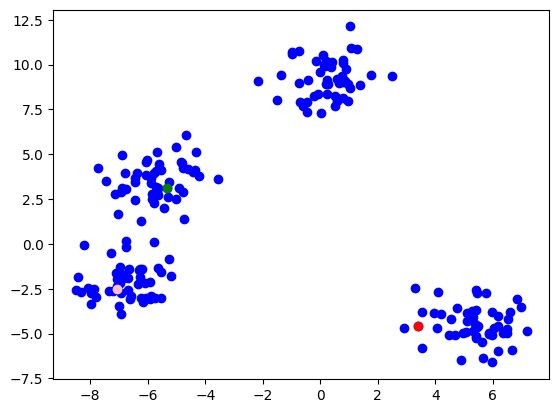

In [ ]:
k=3 # numarul de clusteri
clusters=[] # lista de clusteri

random.seed(14)

used_points = []
for id in range(k):
  p = random.choice(data)
  while p.tolist() in used_points:
    p = random.choice(data)
  used_points.append(p.tolist())
  clusters.append({'centroid': p, 'points': []})


plt.scatter(data[:,0], data[:,1],color="blue")

colors = ['red','green', 'pink', 'orange']

for id in range(k):
  plt.scatter(clusters[id]['centroid'][0],clusters[id]['centroid'][1],color=colors[id])
plt.show()


Functiile necesare

In [ ]:
#Distanta euclidiana
def distance(p1,p2):
  return np.sqrt(np.sum((p2-p1)**2))


# Atribuirea punctelor in clustere
def clusterize():
  for id in range(k):
    clusters[id]['points'] = []

  for point in data:
    min_dist=1e6
    min_id=-1
    for id in range(k):
      dist=distance(point,clusters[id]['centroid'])
      if dist < min_dist:
        min_dist = dist
        min_id = id
    clusters[min_id]['points'].append(point)


# Actualizarea centroizilor
def update_centroids():
 for id in range(k):
  clusters[id]['centroid'] = np.mean(clusters[id]['points'],axis=0)

def display():
  for id in range(k):
    if len(clusters[id]['points']) == 0:
      continue
    plt.scatter(np.array(clusters[id]['points'])[:,0],np.array(clusters[id]['points'])[:,1], color = colors[id])
  plt.show()


Iteratia 1


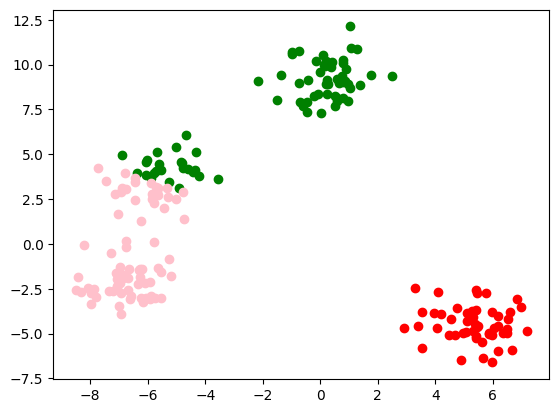

Iteratia 2


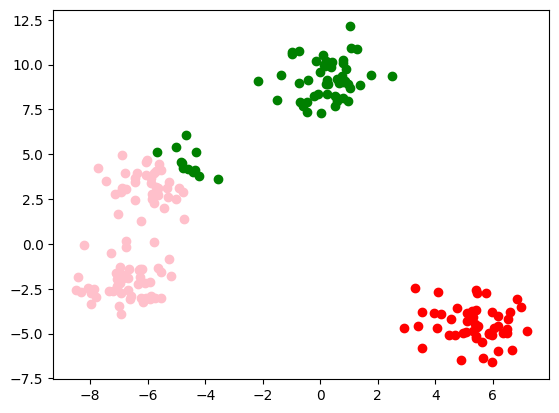

Iteratia 3


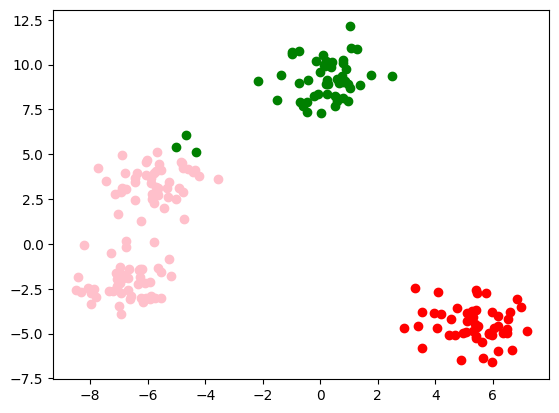

Iteratia 4


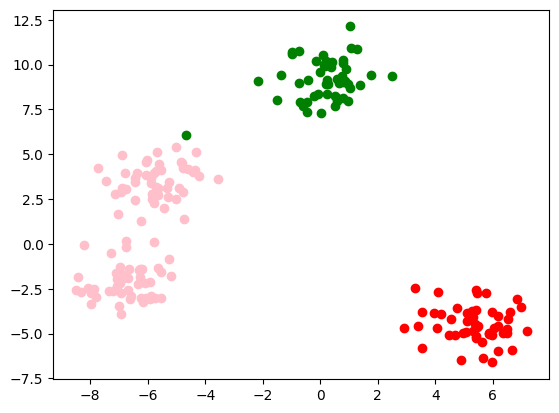

Iteratia 5


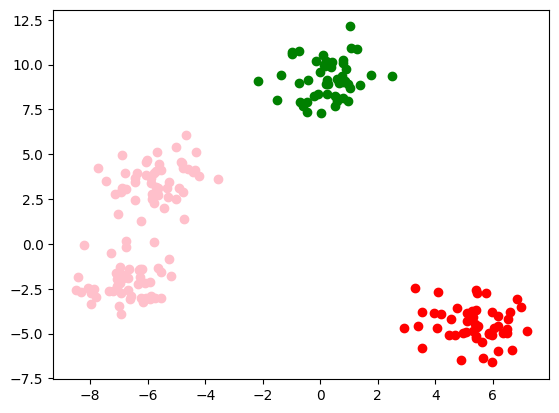

Iteratia 6


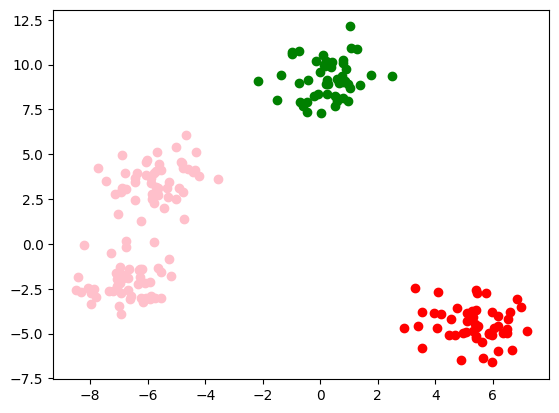

In [ ]:
old_centroids = []

iterations = 1
while not np.all(np.array_equal(old_centroids, [cluster['centroid'] for cluster in clusters])):
  old_centroids = [cluster['centroid'] for cluster in clusters]
  clusterize()
  update_centroids()
  print(f'Iteratia {iterations}')
  iterations+=1
  display()

## Implementare cu sklearn

In [ ]:
from sklearn.cluster import KMeans


k = 3
kmeans = KMeans(k, random_state=0).fit(data)


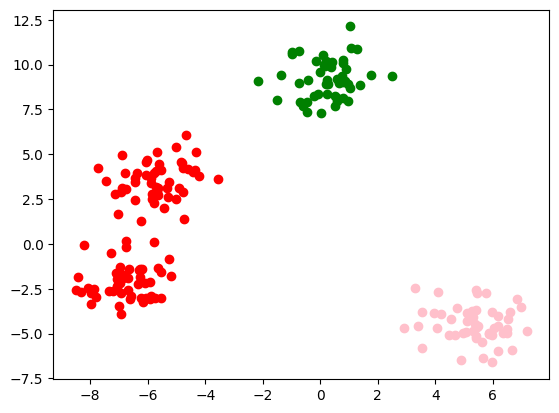

In [ ]:
for p in data:
  label = kmeans.predict([p])
  plt.scatter(p[0],p[1],color = colors[label[0]])
plt.show()

# Stabilirea valorii K

In unele cazuri se poate observa usor vizual valoarea optima de clustere, totusi cand datele noastre au o dimensionalitate mare sau sunt foarte apropiate acest mod nu mai este fezabil.
O tehnica care se poate folosi este "Metoda Cotului". Aceasta calculeaza suma distantelor la patrat dintre puncte si clusterele lor pentru fiecare valoare K incercata. Valoarea scor scada pe masura ce avem mai multe clusterele. Valoarea K optima corespunde punctului in care scorul nostru nu mai scade sau scade foarte putin.

In [ ]:
#Implementare de mana
score = 0
for p in data:
  label = kmeans.predict([p])
  score += np.sum(np.array(kmeans.cluster_centers_[label]-p)**2)
print(score)

1189.1015397033104


In [ ]:
#Scikit calculeaza automat
kmeans.inertia_

1189.1015397033111

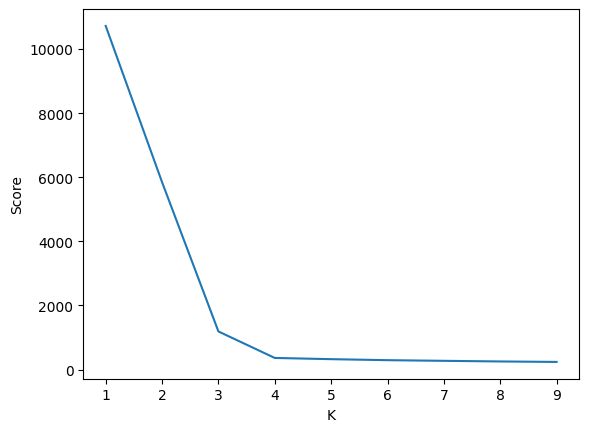

In [ ]:
kvalues = []
scores = []


for k in range(1,10):
  kmeans = KMeans(k, random_state=0).fit(data)
  kvalues.append(k)
  scores.append(kmeans.inertia_)

plt.plot(kvalues,scores)
plt.xlabel('K')
plt.ylabel('Score')
plt.show()


## Problema Kaggle

In celulele urmatoare vom implementa o solutie simpla pentru problema https://www.kaggle.com/competitions/k-means-clustering-for-heart-disease-analysis/overview

Citim datele folosind libraria pandas

In [ ]:
import pandas as pd

data = pd.read_csv('/content/heart_disease.csv')

data.head(n=10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
5,5,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal
6,6,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal
7,7,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal
8,8,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect
9,9,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect


Ajustam formatul datelor prin normalizarea valorilor discrete si inlocuirea valorilor categorice cu vectori de encoding.

In [ ]:
data = data.drop(columns = ['id', 'sex', 'dataset', 'cp', 'restecg', 'exang', 'slope', 'thal', 'fbs' ])

In [ ]:
data.columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca'], dtype='object')

In [ ]:
for feature in ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']:
  data[feature] = [ (val-data[feature].min()) / (data[feature].max()- data[feature].min()) if not np.isnan(val) else -1 for val in data[feature]]

In [ ]:
data.head(n=10)

,age,trestbps,chol,thalch,oldpeak,ca
0,0.714286,0.725,0.386401,0.633803,0.556818,0.000000
1,0.795918,0.800,0.474295,0.338028,0.465909,1.000000
2,0.795918,0.600,0.379768,0.485915,0.590909,0.666667
3,0.183673,0.650,0.414594,0.894366,0.693182,0.000000
4,0.265306,0.650,0.338308,0.788732,0.454545,0.000000
5,0.571429,0.600,0.391376,0.830986,0.386364,0.000000
6,0.693878,0.700,0.444444,0.704225,0.704545,0.666667
7,0.591837,0.600,0.587065,0.725352,0.363636,0.000000
8,0.714286,0.650,0.421227,0.612676,0.454545,0.333333
9,0.510204,0.700,0.336650,0.669014,0.647727,0.000000


In [ ]:
kmeans = KMeans(2, random_state=0).fit(data)

In [ ]:
sample = pd.read_csv('sample.csv')
sample.head(n=4)

,id,cluster
0,0,0
1,1,0
2,3,0
3,4,0


Creeam fisierul de predictii

In [ ]:
ids = []
classes= []

for id in sample['id']:
  ids.append(id)
  classes.append(kmeans.predict([data.iloc[id]])[0])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X d

Salvam in format csv

In [ ]:
results = pd.DataFrame({'id':ids,'cluster':classes})
results.to_csv('result.csv',index=False)

Vizualizare in format 3d a datelor

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
<ipython-input-59-32527f03942a>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.scatter(d[0],d[1], d[3], color = colors[label[0]])
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
<ipython-input-59-32527f03942a>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.scatter(d[0],d[1], d[3], color = colors[l

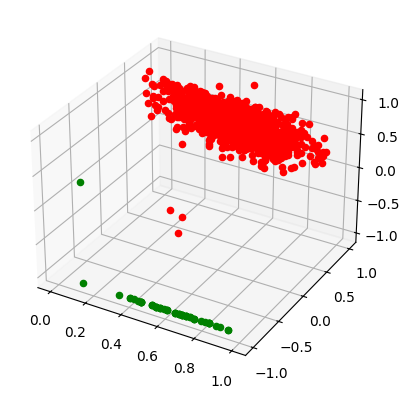

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for id in range(len(data)):
  d=data.iloc[id]
  label = kmeans.predict([d])
  ax.scatter(d[0],d[1], d[3], color = colors[label[0]])
plt.show()

##Aplicatii in Computer Vision##

In acelasi mod in care un set de date poate fi impartit in grupe, putem imparti si o imagine in regiuni. Kmeans poate fi folosit ca o metoda foarte simpla de segmentare a imaginilor. Valorile RGB ale unei poze pot fi considerate ca setul nostru de date, unde un punct este un pixel, iar pixelii apropiati ca culoare sa fie atribuiti la aceeasi clasa ce este reprezenta de un obiect in poza.

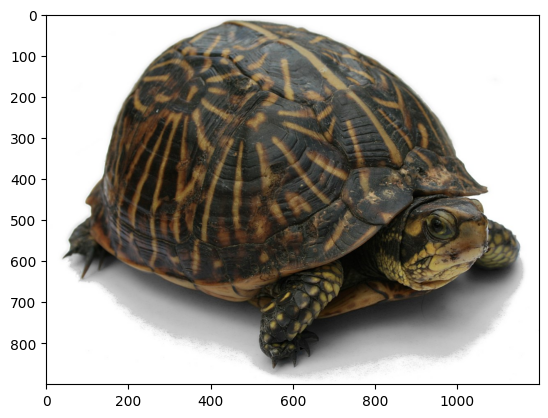

In [ ]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

# Descarcam imaginea
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Florida_Box_Turtle_Digon3_re-edited.jpg/1200px-Florida_Box_Turtle_Digon3_re-edited.jpg"
with urllib.request.urlopen(url) as url_response:
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    img = cv2.imdecode(img_array, -1)


plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

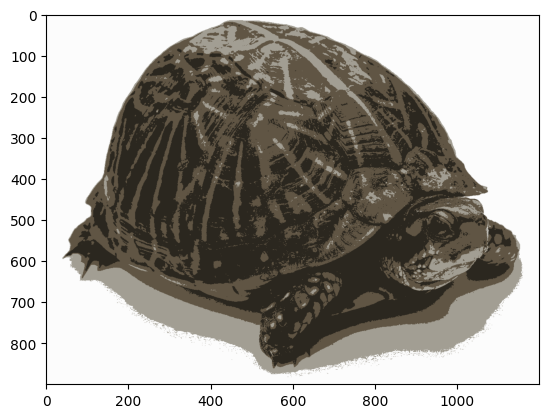

In [ ]:
# Transformam imaginea intr-un array 2D care sa reprezinte setul nostru de date
pixels = img.reshape((-1, 3))
pixels = np.float32(pixels)

stop_criteria=cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER
iterations=10
accuracy=1.0
criteria = (stop_criteria, iterations, accuracy)
k = 4 # numarul de clustere
attempts = 1 # De cate ori sa fie reluat algoritmul cu initializari diferite ale centroizilor


ret, label, center = cv2.kmeans(pixels, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)

# Conversie in formatul de imagine
segmented_image = center[label.flatten()].reshape(img.shape)


plt.imshow(cv2.cvtColor(segmented_image,cv2.COLOR_BGR2RGB))
plt.show()

## Optimizari pentru datele de input

Deseori din datele noastre initiale nu se vor putea extrage usor outliere si determina usor clusterele optime, caz in care sunt necesare niste transformari pe datele de input prin care sa se regleze dimensionalitatea featurilor.
<br>
<br>
Cateva transformari populare ce pot fi aplicate in functie de forma datelor sunt:



1.   Z score scaling - Folosit cand forma datelor seamana cu o distributie gausiana. Implica calcularea mean si standard deviation(std) pentru fiecare feature si simplificarea datelor de input prin formula
  $$x' = \frac{x - \mu}{\sigma}$$
$x$- valoarea curenta unui feature pentru un input<br>
${\mu}$- mean-ul pentru feature<br>
${\sigma}$- std-ul pentru feature<br>
$x'$- valoarea noua pentru feature

<div>
      <img src="https://developers.google.com/static/machine-learning/clustering/images/NormalizeData.png" width="700px" height="350px">  
</div>
<br>  


2.   Log scaling - Folosit pentru cand distributia urmareste o curba de crestere/scadere spre un capat. Implica o transformare logaritmica aplicata pe inputul fiecarui feature
  $$x' = \ln(x)$$<br>
<div>
      <img src="https://developers.google.com/static/machine-learning/data-prep/images/norm-log-scaling-movie-ratings.svg" width="700px" height="350px">  
</div>



Exemplu cu transformare logaritmica

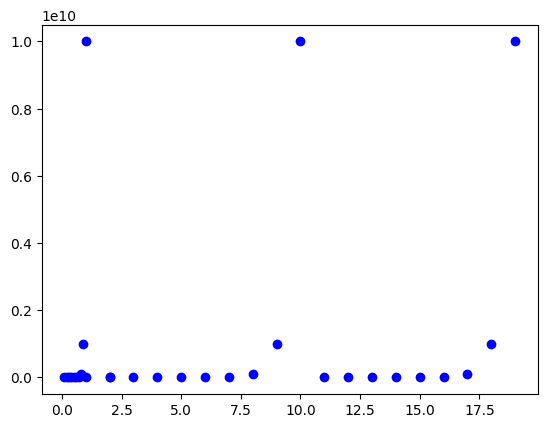

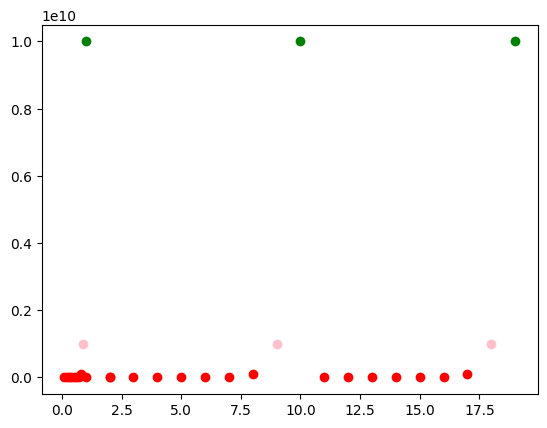

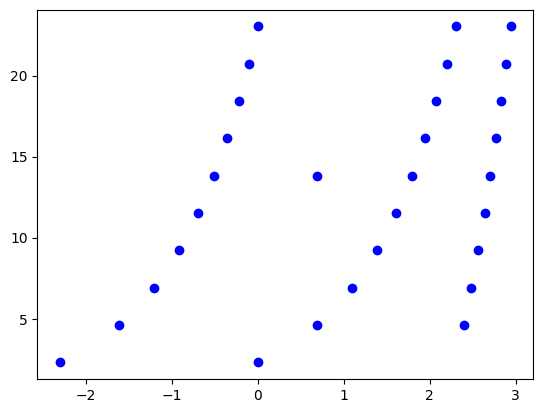

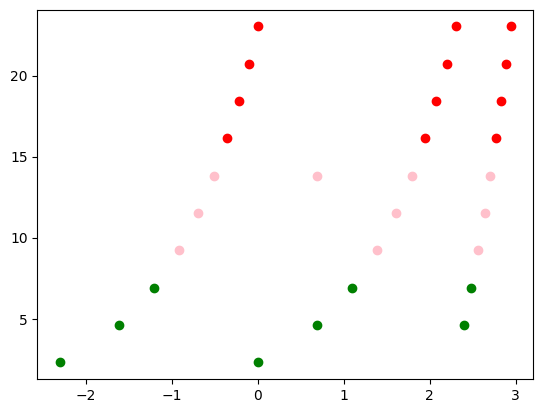

In [ ]:
data=np.array([
  [1, 10],
  [2, 100],
  [3, 1000],
  [4, 10000],
  [5, 100000],
  [6, 1000000],
  [7, 10000000],
  [8, 100000000],
  [9, 1000000000],
  [10, 10000000000],
  [11, 100],
  [12, 1000],
  [13, 10000],
  [14, 100000],
  [15, 1000000],
  [16, 10000000],
  [17, 100000000],
  [18, 1000000000],
  [19, 10000000000],
  [0.1, 10],
  [0.2, 100],
  [0.3, 1000],
  [0.4, 10000],
  [0.5, 100000],
  [0.6, 1000000],
  [0.7, 10000000],
  [0.8, 100000000],
  [0.9, 1000000000],
  [1, 10000000000],
  [2, 1000000]
])
plt.scatter(data[:,0],data[:,1],color='blue')
plt.show()


#Rulam kmeans pe datele initiale
k = 3
kmeans = KMeans(k, random_state=0).fit(data)
for p in data:
  label = kmeans.predict([p])
  plt.scatter(p[0],p[1],color = colors[label[0]])
plt.show()

#Executam transformarea

data = np.log(data)
plt.scatter(data[:,0],data[:,1],color='blue')
plt.show()


#Rulam kmeans pe datele transformate
k = 3
kmeans = KMeans(k, random_state=0).fit(data)
for p in data:
  label = kmeans.predict([p])
  plt.scatter(p[0],p[1],color = colors[label[0]])
plt.show()

# Incheiere

Sper ca v-a placut acest tutorial.
Pe paginile noastre o sa gasiti in continuare informatii despre viitoare cursuri, competiti si evenimente


*   Nitro <br>
https://nitronlp.com/ <br>
https://www.instagram.com/nitro_nlp/

*   AIIS <br>
https://www.aiishow.com/ <br>
https://www.instagram.com/aiis_conference/




